## Observations and Insights 

## **** is a comment or note.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# print(mouse_metadata.head(2))
# print()
# print(study_results.head(2))

combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

combined_data_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [2]:
# ****
#combined_data_df = pd.merge(study_results, mouse_metadata, how="right", on="Mouse ID")
#combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID", how="right", on="MouseID")
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

combined_data_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [3]:
# ****
combined_data_df.count()

print(type(combined_data_df.count()))
combined_data_df.count()

<class 'pandas.core.series.Series'>


Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
# ****
combined_data_df.count()["Mouse ID"]
#combined_data_df["Mouse ID"].count()

print(type(combined_data_df.count()["Mouse ID"]))
combined_data_df.count()["Mouse ID"]

<class 'numpy.int64'>


1893

In [5]:
# ****
len(combined_data_df["Mouse ID"].unique())

combined_data_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()

# unique_df = combined_data_df.drop_duplicates(subset="Mouse ID")
# len(unique_df)

249

In [6]:
# **** If using all scalar values, you must pass an index

len(combined_data_df["Mouse ID"].unique())

combined_data_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()

pd.DataFrame({
            "Total of mice": [len(combined_data_df["Mouse ID"].unique())]
            })

tot_mice = combined_data_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()
pd.DataFrame({
            "Total of mice": [tot_mice]
            })

,Total of mice
0,249


In [7]:
# *****
cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

type(cars)

pd.DataFrame(cars, columns = ['Brand', 'Price'])

#print (df)

,Brand,Price
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [8]:
# ****
pd.DataFrame({
            'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
            'Price': [22000,25000,27000,35000]
            })


,Brand,Price
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


### Checking the number of mice in the DataFrame.

In [9]:
pd.DataFrame({
            "Total of mice": [len(combined_data_df["Mouse ID"].unique())]
            })

,Total of mice
0,249


### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

In [10]:
duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
print(type(duplicate_mouse_id))

pd.DataFrame({'Mouse ID': duplicate_mouse_id})

<class 'numpy.ndarray'>


,Mouse ID
0,g989


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
type(duplicate_mouse_id)

pd.DataFrame({'Mouse ID': duplicate_mouse_id})

,Mouse ID
0,g989


### Optional: Get all the data for the duplicate mouse ID. 

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]

# len(duplicate_mouse_df)

# duplicate_mouse_df.count()

duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.loc[combined_data_df["Mouse ID"] != "g989"]

# clean_data_df = combined_data_df[combined_data_df['Mouse ID'].isin([duplicate_mouse_id])==False]

clean_data_df["Mouse ID"].count()

1880

In [14]:
duplicate_mouse_df = clean_data_df.loc[combined_data_df["Mouse ID"] == "g989"]

duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [15]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.drop_duplicates(subset="Mouse ID")["Mouse ID"].count()

len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [16]:
combined_data_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [17]:
means = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

means = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stds = clean_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats_tbl_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems})
summary_stats_tbl_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_stats_tbl_df = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats_tbl_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

In [20]:
# clean_data_df.loc[clean_data_df["Drug Regimen"] != "g989"]

clean_data_df["Drug Regimen"].unique()

clean_data_df.loc[(clean_data_df["Mouse ID"] == "b742") & (clean_data_df["Drug Regimen"] != "Capomulin")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [21]:
# ****
value_counts = clean_data_df['Drug Regimen'].value_counts()
print(value_counts)

clean_data_df['Drug Regimen'].count()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


1880

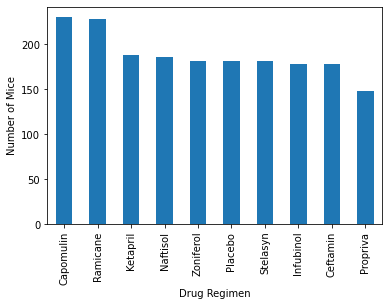

In [22]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

value_counts = clean_data_df['Drug Regimen'].value_counts()
#value_counts.plot(kind="bar")
value_counts.plot.bar()
plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

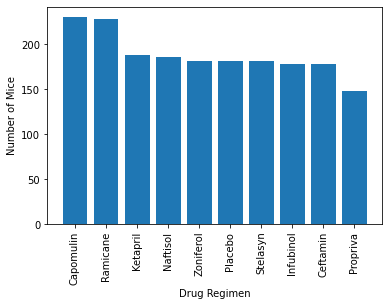

In [23]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
value_counts = clean_data_df['Drug Regimen'].value_counts()
plt.bar(value_counts.index.values,value_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

In [24]:
#counts = mouse_metadata.Sex.value_counts()
#counts

combined_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()


Male      125
Female    124
Name: Sex, dtype: int64

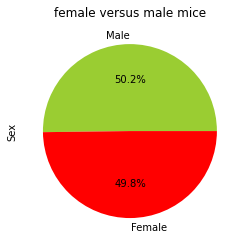

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = combined_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()

#counts.plot(kind="pie",autopct='%1.3f%%')

counts.plot.pie(y='Sex',autopct="%1.1f%%",title = "female versus male mice", legend=False, colors = ["yellowgreen", "red"])

plt.show()

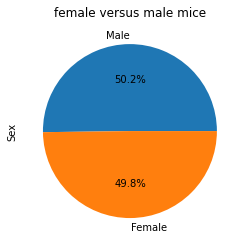

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = combined_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.title("female versus male mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()

max_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [28]:
# A commonly definition of a data point is:
# low outliers are below Q1 - (1.5 * IQR) 
# High outliers are below Q3 + (1.5 * IQR) 

# interquartile range (IQR) = Q3 - Q1

In [29]:
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
max_tumor_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,45.466677,1,Ramicane,Male,3,22
7,a444,45,45.000000,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)].to_frame()

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


In [31]:
# Quantitatively determine "ramicane" outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)].to_frame()

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


In [32]:
# ****
# **** inf_lower_bound is 36.83290494999999 so if any result is lower than this, it is an outlier.
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_lower_bound

36.83290494999999

In [33]:
# Quantitatively determine "infubinol" outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)].to_frame()


Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Tumor Volume (mm3)
31,36.321346


In [34]:
# Quantitatively determine "ceftamin" outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)].to_frame()

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Tumor Volume (mm3)


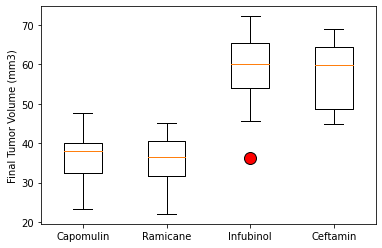

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
max_tumor_df = clean_data_df.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()

merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(clean_data_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

outliers = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [36]:
# **** Fin a mouse ID 
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


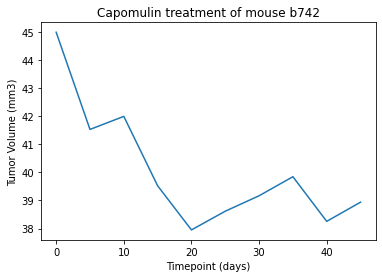

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
b742_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'b742']

plt.plot(b742_df['Timepoint'], b742_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b742')
plt.show()

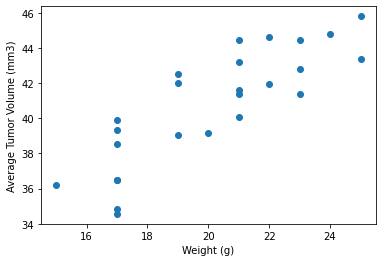

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [39]:
# **** Why to use [0] to get 0.8419363424694716
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_average_df.head()

print(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)']))

st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0]

(0.8419363424694717, 1.322572243471279e-07)


0.8419363424694717

In [40]:
# ****
# **** slope = change in Y / change in X
# **** b is the vaule of Y when X = 0
# **** y = mx + b
model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])

print(model, "\n")
print(F"model[0]= {model[0]}    model[1]= {model[1]}")

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134) 

model[0]= 0.9544396890241045    model[1]= 21.552160532685015


The correlation between mouse weight and the average tumor volume is 0.84


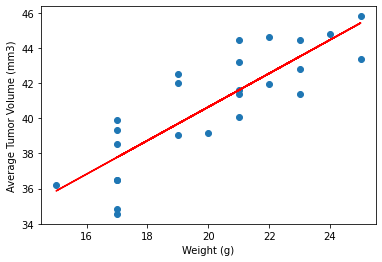

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()

# scipy.stats
# four types of correlations: Pearson correlation, Kendall rank correlation, 
# Spearman correlation, and the Point-Biserial correlation
corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()